

```
`# This is formatted as code`
```

# **Data Preparation :**

In [ ]:
#importing libraries :

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, metrics, ensemble
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb

In [ ]:
#Importing dataset :

df = pd.read_csv('water_potability.csv')

In [ ]:
#Displaying dataset :

print(df.head())
print("data shape", " : ",df.shape)

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
data shape  :  (3276, 10)


In [ ]:
#Displaying info about data before cleaning data :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#Detect sum of null values for each column :

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Fill records with Null values with mean of the column :
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [ ]:
#showing sum of null values for each column after filling  :

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.shape

(3276, 10)

In [ ]:
#Saving cleaned data in a csv file :

df.to_csv('waterPotability.csv')

# **Data Visualization :**

In [ ]:
#using data.describe() function to look on a summary on data with potability = 0 :

df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.545489,31.057540,8543.068788,1.501045,31.941870,80.047317,3.334554,15.642622,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.085378,197.123423,20809.618280,7.090334,334.564290,422.229331,14.293508,66.303555,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [ ]:
#using data.describe() function to look on a summary on data with potability = 1 :

df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.343952,35.547041,9101.010208,1.702988,41.865385,82.048446,3.263907,15.971941,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.073783,196.632907,21199.386614,7.215163,332.566990,420.712729,14.162809,66.539684,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [ ]:
#Display the percentage of potable and Non-potaple water in our data :

d= pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
             labels={'label':'Potability','Potability':'No. Of Samples'})
fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8f74adc10>]],
      dtype=object)

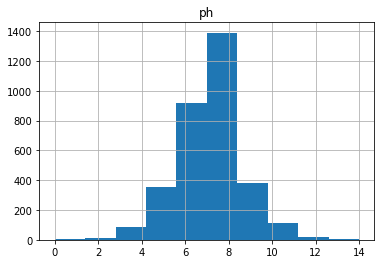

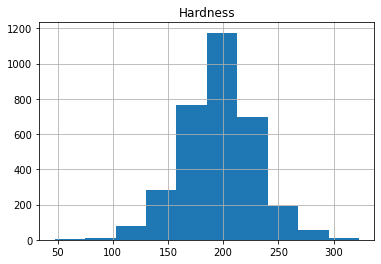

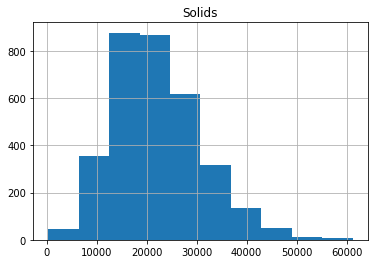

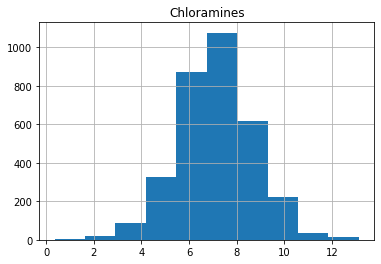

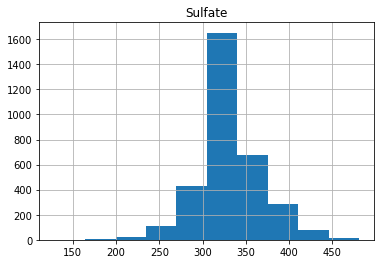

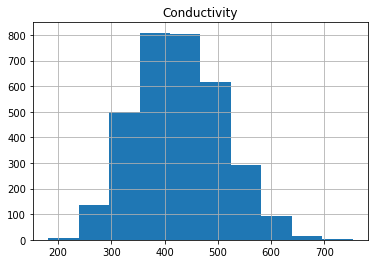

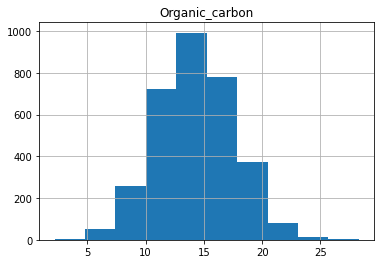

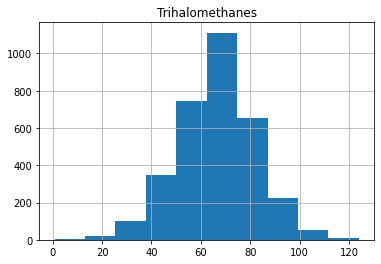

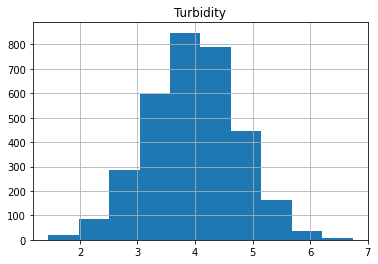

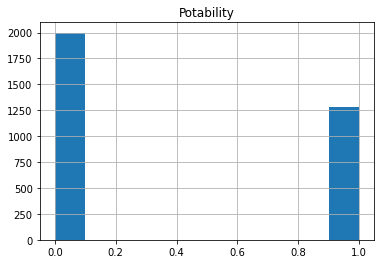

In [ ]:
# columns in histogram charts (visualizing our data) :

df.hist(column='ph')
df.hist(column='Hardness')
df.hist(column='Solids')
df.hist(column='Chloramines')
df.hist(column='Sulfate')
df.hist(column='Conductivity')
df.hist(column='Organic_carbon')
df.hist(column='Trihalomethanes')
df.hist(column='Turbidity')
df.hist(column='Potability')

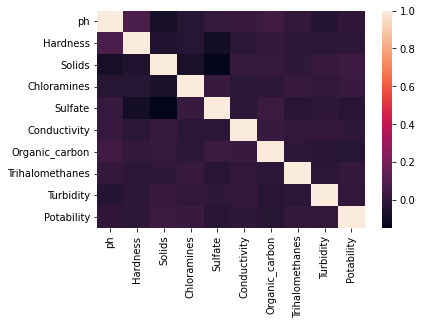

In [ ]:
#Display correlation coefficients between the features :

corr = df.corr()
sns.heatmap(corr)

# **Modeling :**

In [ ]:
#Display dataframe after data preparation :

print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [ ]:
#Split dataframe into data and labels :

data = df.iloc[:, :-1]
labels = df.iloc[:, -1]

In [ ]:
#Display data :

print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [ ]:
#Display labels :

print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [ ]:
#Split data :

X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.3, random_state = 66)
print("Training Dataset:", X_train.shape)
print("Test Dataset:", X_test.shape)
print("Training labels", y_train.shape)
print("test labels", y_test.shape)

Training Dataset: (2293, 9)
Test Dataset: (983, 9)
Training labels (2293,)
test labels (983,)


In [ ]:
accuracy_scores = {}

ACCURACY OF THE GradientBoostingClassifier MODEL:  0.8026449643947101
AUC OF THE GradientBoostingClassifier MODEL:  0.7734214138641042
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       611
           1       0.79      0.65      0.71       372

    accuracy                           0.80       983
   macro avg       0.80      0.77      0.78       983
weighted avg       0.80      0.80      0.80       983



Text(91.68, 0.5, 'predicted label')

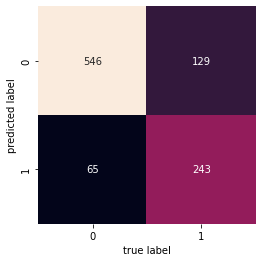

In [ ]:
classifier = ensemble.GradientBoostingClassifier(n_estimators = 300)

#Train model :

model = classifier.fit(X_train, y_train)

#Make predictions :

y_pred = model.predict(X_test)

# using metrics module for accuracy and AUC calculation :

accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE GradientBoostingClassifier MODEL: ", accuracy)
accuracy_scores['GradientBoostingClassifier'] = accuracy
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC OF THE GradientBoostingClassifier MODEL: ", auc)

#MDisplay the classification report :

report = metrics.classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix for good measure :


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

ACCURACY OF THE ExtraTreesClassifier MODEL:  0.7151576805696847
AUC OF THE ExtraTreesClassifier MODEL:  0.6457376414480053
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       611
           1       0.76      0.36      0.49       372

    accuracy                           0.72       983
   macro avg       0.73      0.65      0.65       983
weighted avg       0.73      0.72      0.68       983



Text(91.68, 0.5, 'predicted label')

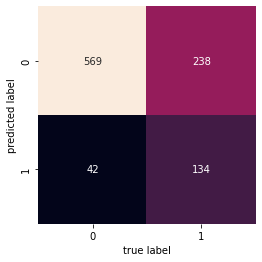

In [ ]:
classifier = ensemble.ExtraTreesClassifier(n_estimators = 300)

#Train model :

model = classifier.fit(X_train, y_train)

#Make predictions :

y_pred = model.predict(X_test)

# using metrics module for accuracy and AUC calculation :

accuracy = metrics.accuracy_score(y_test, y_pred)
print('ACCURACY OF THE ExtraTreesClassifier MODEL: ', accuracy)
accuracy_scores['ExtraTreesClassifier'] = accuracy
auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC OF THE ExtraTreesClassifier MODEL: ', auc)

#Display the classification report :

report = metrics.classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix for good measure:

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

ACCURACY OF THE svm MODEL:  0.6215666327568667
AUC OF THE svm MODEL:  0.5
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       611
           1       0.00      0.00      0.00       372

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.39      0.62      0.48       983



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(91.68, 0.5, 'predicted label')

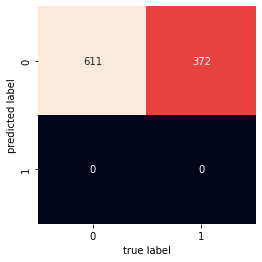

In [ ]:
classifier = svm.SVC()

#Train model :

model = classifier.fit(X_train, y_train)

#Make predictions :

y_pred = model.predict(X_test)

# using metrics module for accuracy and AUC calculation :

accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE svm MODEL: ", accuracy)
accuracy_scores['SVM'] = accuracy
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC OF THE svm MODEL: ", auc)

#MDisplay the classification report :

report = metrics.classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix for good measure :

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

ACCURACY OF THE KNeighborsClassifier MODEL:  0.5544252288911495
AUC OF THE KNeighborsClassifier MODEL:  0.49909147704274676
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       611
           1       0.38      0.27      0.32       372

    accuracy                           0.55       983
   macro avg       0.50      0.50      0.49       983
weighted avg       0.53      0.55      0.54       983



Text(91.68, 0.5, 'predicted label')

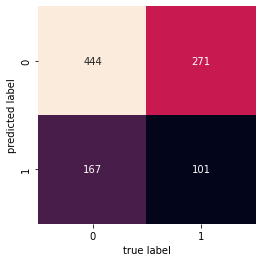

In [ ]:
classifier = KNeighborsClassifier()

#Train model :

model = classifier.fit(X_train, y_train)

#Make predictions :

y_pred = model.predict(X_test)

# using metrics module for accuracy and AUC calculation :

accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE KNeighborsClassifier MODEL: ", accuracy)
accuracy_scores['KNeighborsClassifier'] = accuracy
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC OF THE KNeighborsClassifier MODEL: ", auc)

#MDisplay the classification report :

report = metrics.classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix for good measure :

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

ACCURACY OF THE xgb MODEL:  0.7914547304170906
AUC OF THE xgb MODEL:  0.7602137338753674
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       611
           1       0.78      0.63      0.70       372

    accuracy                           0.79       983
   macro avg       0.79      0.76      0.77       983
weighted avg       0.79      0.79      0.79       983



Text(91.68, 0.5, 'predicted label')

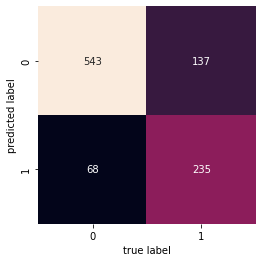

In [ ]:
classifier = xgb.XGBClassifier(n_estimators=300)

#Train model :

model = classifier.fit(X_train, y_train)

#Make predictions :

y_pred = model.predict(X_test)

# using metrics module for accuracy and AUC calculation :

accuracy = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE xgb MODEL: ", accuracy)
accuracy_scores['XGB'] = accuracy
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC OF THE xgb MODEL: ", auc)

#MDisplay the classification report :

report = metrics.classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix for good measure :

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

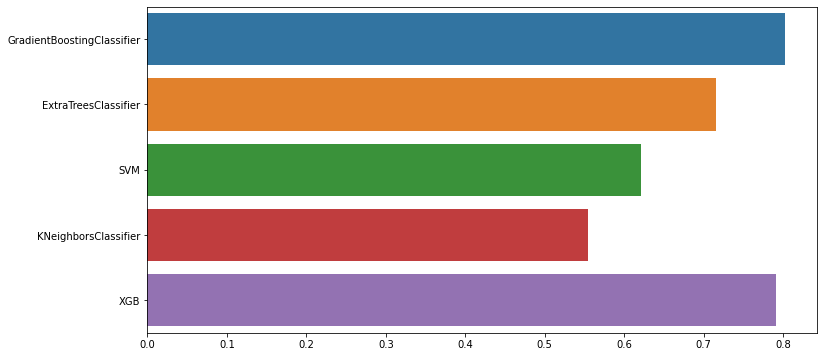

In [ ]:
#Finding which model performed better :
plt.figure(figsize=(12, 6))
model_names = ['GradientBoostingClassifier', 'ExtraTreesClassifier', 'SVM', 'KNeighborsClassifier', 'XGB']
model_accuracies = [accuracy_scores['GradientBoostingClassifier'], accuracy_scores['ExtraTreesClassifier'], accuracy_scores['SVM'], accuracy_scores['KNeighborsClassifier'], accuracy_scores['XGB']]
sns.barplot(x=model_accuracies, y=model_names)

In [ ]:
print('Gardient Boosting Classifier and GXBoosting Performed Best.')

Gardient Boosting Classifier and GXBoosting Performed Best.
